In [2]:
!pip install kaggle

In [4]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [1]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 162M/163M [00:08<00:00, 20.6MB/s]
100% 163M/163M [00:08<00:00, 20.1MB/s]


In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [9]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_185.jpg', 'with_mask_186.jpg', 'with_mask_1393.jpg', 'with_mask_1287.jpg', 'with_mask_521.jpg']
['with_mask_1298.jpg', 'with_mask_64.jpg', 'with_mask_3086.jpg', 'with_mask_1244.jpg', 'with_mask_1068.jpg']


In [10]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3412.jpg', 'without_mask_3229.jpg', 'without_mask_858.jpg', 'without_mask_3404.jpg', 'without_mask_632.jpg']
['without_mask_2406.jpg', 'without_mask_2327.jpg', 'without_mask_1129.jpg', 'without_mask_2134.jpg', 'without_mask_3153.jpg']


In [11]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the two class of Images

with mask --> 1

without mask --> 0

In [12]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [13]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [15]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Images


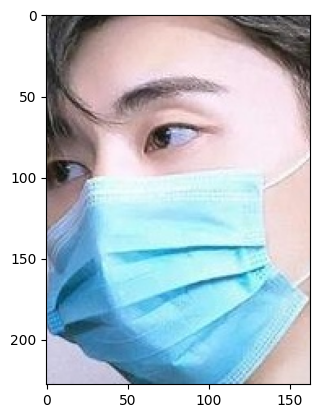

In [16]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

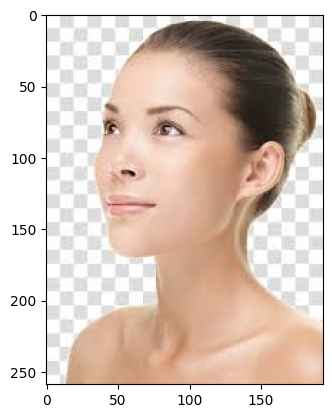

In [42]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

Resize the Images

Convert the images to numpy arrays

In [18]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [19]:
type(data)

list

In [20]:
len(data)

7553

array([[[ 25,  19,  19],
        [ 25,  19,  19],
        [ 22,  16,  16],
        ...,
        [212, 206, 184],
        [219, 213, 191],
        [222, 216, 194]],

       [[ 22,  16,  16],
        [ 19,  13,  13],
        [ 20,  14,  14],
        ...,
        [215, 209, 187],
        [222, 216, 194],
        [227, 221, 199]],

       [[ 20,  14,  14],
        [ 19,  13,  13],
        [ 17,  11,  11],
        ...,
        [209, 203, 181],
        [188, 182, 160],
        [208, 202, 180]],

       ...,

       [[ 81,  81,  81],
        [116, 116, 116],
        [153, 153, 153],
        ...,
        [  1,   1,   0],
        [110, 110, 108],
        [255, 255, 255]],

       [[ 48,  48,  48],
        [ 59,  59,  59],
        [ 81,  81,  81],
        ...,
        [  7,   7,   6],
        [ 53,  53,  52],
        [169, 170, 166]],

       [[ 47,  47,  47],
        [ 64,  64,  64],
        [ 99,  99,  99],
        ...,
        [  9,   9,   9],
        [ 11,  11,   9],
        [ 19,  19,  16]]], dtype=uint8)
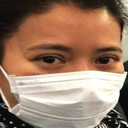

In [21]:
data[0]

In [22]:
type(data[0])

numpy.ndarray

In [23]:
data[0].shape

(128, 128, 3)

In [24]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [25]:
type(X)

numpy.ndarray

In [26]:
type(Y)

numpy.ndarray

In [27]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [28]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 86,  51,  36],
        [121,  85,  71],
        [199, 174, 161]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 73,  36,  21],
        [118,  80,  65],
        [223, 203, 185]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [103,  66,  49],
        [118,  80,  62],
        [168, 142, 121]],

       ...,

       [[ 38,  38,  38],
        [ 47,  47,  47],
        [ 35,  35,  35],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 40,  40,  40],
        [ 40,  40,  40],
        [ 37,  37,  37],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 42,  42,  42],
        [ 36,  36,  36],
        [ 43,  43,  43],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
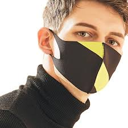

In [31]:
X_train[0]

In [32]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.3372549 , 0.2       , 0.14117647],
        [0.4745098 , 0.33333333, 0.27843137],
        [0.78039216, 0.68235294, 0.63137255]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.28627451, 0.14117647, 0.08235294],
        [0.4627451 , 0.31372549, 0.25490196],
        [0.8745098 , 0.79607843, 0.7254902 ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.40392157, 0.25882353, 0.19215686],
        [0.4627451 , 0.31372549, 0.24313725],
        [0.65882353, 0.55686275, 0.4745098 ]],

       ...,

       [[0.14901961, 0.14901961, 0.14901961],
        [0.18431373, 0.18431373, 0.18431373],
        [0.1372549 , 0

Building a Convolutional Neural Networks (CNN)

In [33]:
import tensorflow as tf
from tensorflow import keras

In [34]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [35]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [36]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 10s 24ms/step - loss: 0.4810 - acc: 0.7865 - val_loss: 0.3409 - val_acc: 0.8645
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2774 - acc: 0.8856 - val_loss: 0.2381 - val_acc: 0.8876
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2321 - acc: 0.9110 - val_loss: 0.2552 - val_acc: 0.8843
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1900 - acc: 0.9233 - val_loss: 0.2598 - val_acc: 0.9008
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1703 - acc: 0.9367 - val_loss: 0.3054 - val_acc: 0.8860


Model Evaluation

In [37]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.3178 - acc: 0.8921
Test Accuracy = 0.8921244144439697


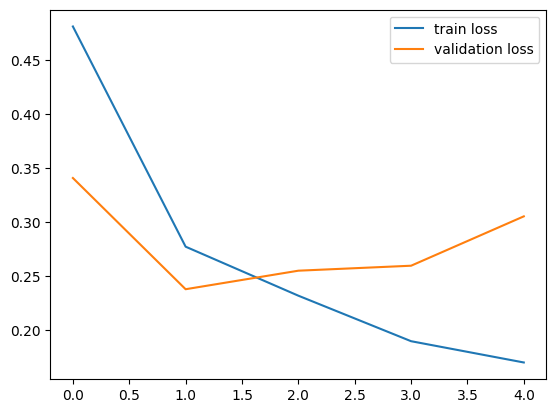

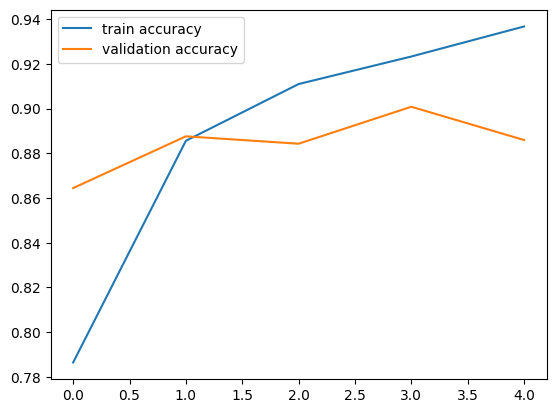

In [38]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

Path of the image to be predicted: /content/face-cover-3-pack-black-61ee42255d2a9.jpg


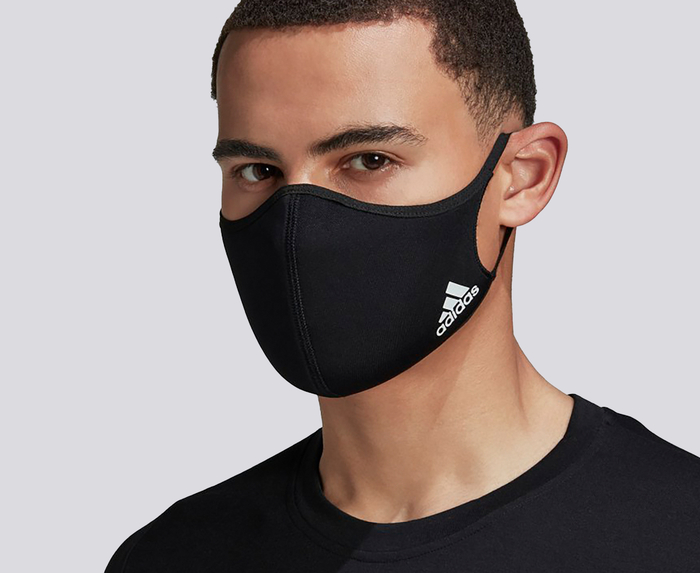

1/1 [==============================] - 0s 353ms/step
[[0.05284567 0.95488614]]
1
The person in the image is wearing a mask


In [39]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/face pic.jpg


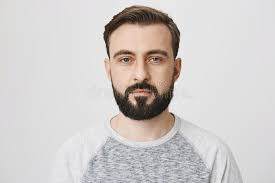

1/1 [==============================] - 0s 19ms/step
[[0.38326707 0.60382706]]
1
The person in the image is not wearing a mask


In [44]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is not wearing a mask')